In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# daten für drift-analyse einlesen
path_drift = "c:/Users/charl/Desktop/Uni_Leipzig/MA/Code/PlatformIO/IMU_Audit/MA_files/Recherche/Ergebnisse/drift_log.txt"
df_drift = pd.read_csv(path_drift, sep=' ', header=0)
# print(df_drift.head())

# daten von radian pro sekunde in grad pro sekunde umrechnen
df_drift['x'] = df_drift['x']*180/np.pi
df_drift['y'] = df_drift['y']*180/np.pi
df_drift['z'] = df_drift['z']*180/np.pi
df_drift




,x,y,z
0,4.584980,-2.905011,-0.840013
1,3.482495,-3.027509,-1.137493
2,1.504988,-2.467500,-1.120018
3,0.927504,-2.380009,-0.157506
4,2.415017,-2.415017,-2.187496
...,...,...,...
995,2.415017,-2.537515,-2.047522
996,2.135013,-2.782512,-0.630024
997,1.855008,-2.834995,-1.102485
998,0.805006,-2.537515,-1.575004


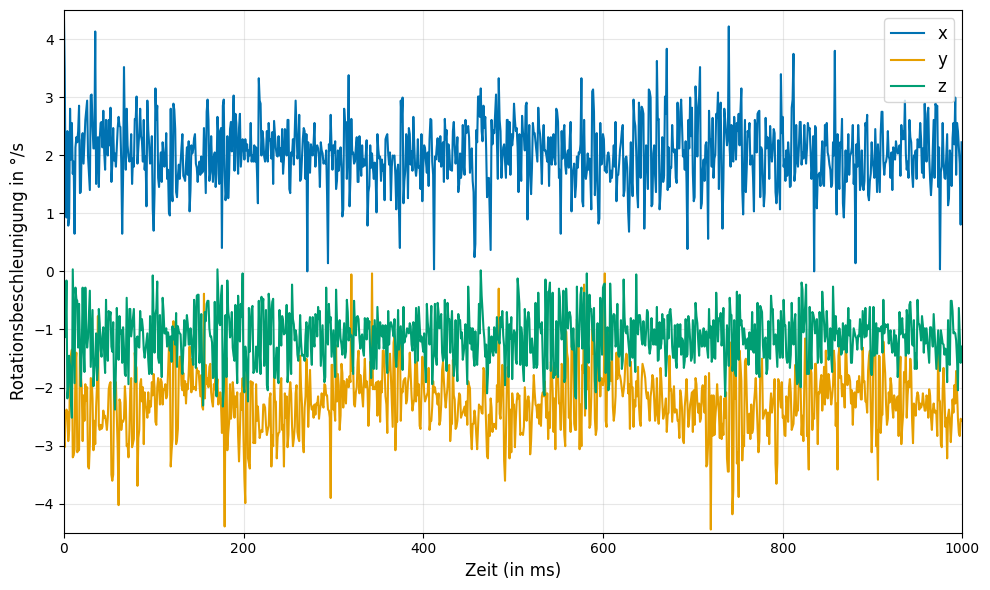

In [4]:
# Plot
plt.figure(figsize=(10, 6))

# Verlauf der Spalten plotten
colors = ["#0072B2", "#E69F00", "#009E73"]  
plt.plot(df_drift.index, df_drift["x"], label="x", color=colors[0])
plt.plot(df_drift.index, df_drift["y"], label="y", color=colors[1])
plt.plot(df_drift.index, df_drift["z"], label="z", color=colors[2])

# Achsentitel und Beschriftungen
# plt.title("Drift des Gyroskops (x-. y-, z-Achse) gemessen bei Stillstand des Roboters für 1000 ms", fontsize=14)
plt.xlabel("Zeit (in ms)", fontsize=12)
plt.ylabel("Rotationsbeschleunigung in °/s", fontsize=12)

# Legende und Gitter
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

# Diagramm anzeigen
# plt.xlim(0, 1000)
# plt.ylim(-0.1, 0.1)
plt.xlim(0, 1000)
plt.ylim(-4.5, 4.5)
plt.tight_layout()
plt.show()

In [7]:
# Durchschnittswert für x-, y- und z-Achse berechnen
df_drift_avg_x = df_drift["x"].mean()
df_drift_avg_y = df_drift["y"].mean()
df_drift_avg_z = df_drift["z"].mean()
print("Durchschnittswert x-Achse: ", df_drift_avg_x)
print("Durchschnittswert y-Achse: ", df_drift_avg_y)
print("Durchschnittswert z-Achse: ", df_drift_avg_z)

Durchschnittswert x-Achse:  2.0306306079212577
Durchschnittswert y-Achse:  -2.2385991614679557
Durchschnittswert z-Achse:  -1.134857447519842


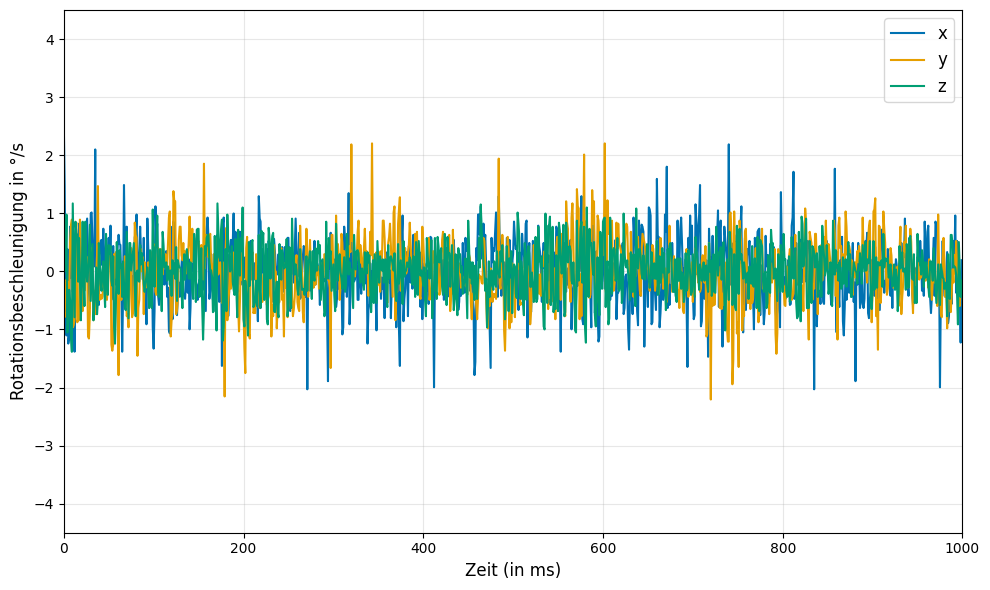

In [5]:
# gleicher plot aber durchschnittswerte über 1000 ms ermittelt und abgezogen

# Durchschnittswert für x-, y- und z-Achse berechnen
df_drift_avg_x = df_drift["x"].mean()
df_drift_avg_y = df_drift["y"].mean()
df_drift_avg_z = df_drift["z"].mean()

# Durchschnittswerte von den Spalten abziehen
df_drift_avg = df_drift.copy()
df_drift_avg["x"] -= df_drift_avg_x
df_drift_avg["y"] -= df_drift_avg_y
df_drift_avg["z"] -= df_drift_avg_z

# Plot
plt.figure(figsize=(10, 6))

# Verlauf der Spalten plotten
# plt.plot(df_drift_avg.index, df_drift_avg["x"], label="x")
# plt.plot(df_drift_avg.index, df_drift_avg["y"], label="y")
# plt.plot(df_drift_avg.index, df_drift_avg["z"], label="z")
# Verlauf der Spalten plotten
colors = ["#0072B2", "#E69F00", "#009E73"]  
plt.plot(df_drift_avg.index, df_drift_avg["x"], label="x", color=colors[0])
plt.plot(df_drift_avg.index, df_drift_avg["y"], label="y", color=colors[1])
plt.plot(df_drift_avg.index, df_drift_avg["z"], label="z", color=colors[2])

# Achsentitel und Beschriftungen
# plt.title("Drift des Gyroskops (x-. y-, z-Achse) gemessen bei Stillstand des Roboters für 1000 ms, kalibriert", fontsize=14)
plt.xlabel("Zeit (in ms)", fontsize=12)
plt.ylabel("Rotationsbeschleunigung in °/s", fontsize=12)

# Legende und Gitter
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

# Diagramm anzeigen
# gleicher ausschnitt wie oben
# plt.xlim(0, 1000)
# plt.ylim(-0.1, 0.1)
plt.xlim(0, 1000)
plt.ylim(-4.5, 4.5)
plt.tight_layout()
plt.show()
